In [1]:
pwd

'/home/wsuser/work'

In [2]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_414914e00403461ba22f61fbec66a2d3 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='QdgkhHwm1hhHcsgWGLXt_xe-nVUxV0JdplObZ689a-eO',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_414914e00403461ba22f61fbec66a2d3.get_object(Bucket='nftanalyticsregression-donotdelete-pr-ovuhqlojrerxvm',Key='NFT_Sales (1).csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Date,Sales_USD_cumsum,Number_of_Sales_cumsum,Active_Market_Wallets_cumsum,Primary_Sales_cumsum,Secondary_Sales_cumsum,AverageUSD_cum,Sales_USD,Number_of_Sales,Active_Market_Wallets,Primary_Sales
0,2017-06-22,0.00,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-06-23,1020.30,19,8.0,0,19.0,53.70,1020.30,19.0,8.0,0.0
2,2017-06-24,2261.14,40,21.0,0,21.0,56.53,1240.84,21.0,13.0,0.0
3,2017-06-25,2778.69,53,28.0,0,13.0,52.43,517.55,13.0,7.0,0.0
4,2017-06-26,3203.32,67,34.0,0,14.0,47.81,424.63,14.0,6.0,0.0


In [3]:
df.isnull().any()

Date                            False
Sales_USD_cumsum                False
Number_of_Sales_cumsum          False
Active_Market_Wallets_cumsum     True
Primary_Sales_cumsum            False
Secondary_Sales_cumsum           True
AverageUSD_cum                   True
Sales_USD                        True
Number_of_Sales                  True
Active_Market_Wallets            True
Primary_Sales                    True
dtype: bool

In [4]:
from sklearn.impute import SimpleImputer

In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [11]:
import numpy as np
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') 
imputer = imputer.fit(x[:, 1:])
x[:, 1:] = imputer.transform(x[:, 1:])

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [14]:
import matplotlib.pyplot as plt

In [55]:
x = df['Date'].values
y = df['Sales_USD'].values

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [19]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
regressor = DecisionTreeRegressor()

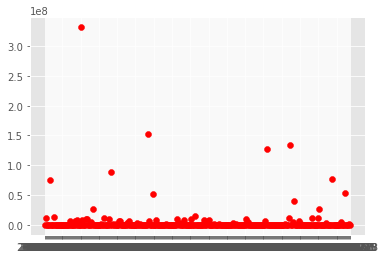

In [57]:
plt.scatter(x_test, y_test, color = 'red') #SCATTER PLOT

In [34]:
df.head()

,Date,Sales_USD_cumsum,Number_of_Sales_cumsum,Active_Market_Wallets_cumsum,Primary_Sales_cumsum,Secondary_Sales_cumsum,AverageUSD_cum,Sales_USD,Number_of_Sales,Active_Market_Wallets,Primary_Sales
0,2017-06-22,0.00,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-06-23,1020.30,19,8.0,0,19.0,53.70,1020.30,19.0,8.0,0.0
2,2017-06-24,2261.14,40,21.0,0,21.0,56.53,1240.84,21.0,13.0,0.0
3,2017-06-25,2778.69,53,28.0,0,13.0,52.43,517.55,13.0,7.0,0.0
4,2017-06-26,3203.32,67,34.0,0,14.0,47.81,424.63,14.0,6.0,0.0


In [40]:
x = df.iloc[:,8:11].values
y = df.iloc[:,7:8].values

In [41]:
x.shape

(1606, 3)

In [42]:
y.shape

(1606, 1)

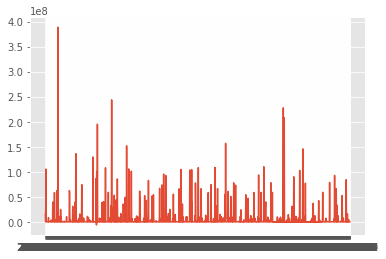

In [58]:
plt.plot(x_train,y_train) #PLOTTING

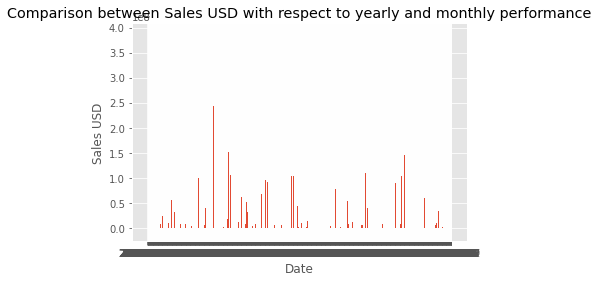

In [59]:
#BAR GRAPH
plt.bar(x_train,y_train)
plt.title('Comparison between Sales USD with respect to yearly and monthly performance')
plt.xlabel('Date')
plt.ylabel('Sales USD')
plt.show()

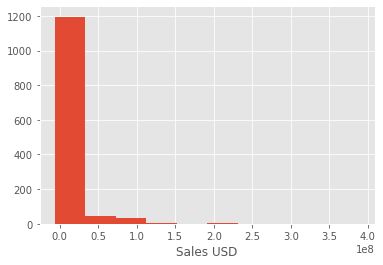

In [61]:
#HISTOGRAM
plt.hist(y_train)
plt.xlabel('Sales USD')
plt.show()